# Machine Learning Assignment 1 - Lavanya Lakshmana Perumal (138485)

Importing the packages and uploaded the dataset and splited x and y value.

In [230]:
import pandas as pd
import numpy as np 
import seaborn as sns
from matplotlib import pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut

# print(sklearn.__version__)

df = pd.read_csv("/Users/lavanyalakshmanaperumal/Downloads/diabetes.csv")

x=df.drop(columns=["Outcome"],axis=1)
y=df["Outcome"]

Scaled the data by writing a class for standard scaler and transformed the data

In [231]:
# Scale data using standard scaler
class StandardScaler:
    def _init_(self):
        self.mean_ = None
        self.std_ = None

    def fit(self, x):
        self.mean_ = np.mean(x, axis=0)
        self.std_ = np.std(x, axis=0)

    def transform(self, X):
        return (x - self.mean_) / self.std_

scaler = StandardScaler()
scaler.fit(x)
x_scaled = scaler.transform(x)

In [232]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [233]:
x_scaled.shape

(768, 8)

In [234]:
x_scaled.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


Splitted the dataset into training and testing

In [235]:
x_train,x_test,y_train,y_test=train_test_split(scaled_x,y, train_size=0.2,random_state=555)

print("X Train",x_train,"X Test",x_test,"Y Train",y_train,"Y Test",y_test)

X Train [[ 1.23388019 -1.12339636 -0.729221   ... -0.96364429 -1.01438629
   0.74529338]
 [-1.14185152  0.31627232 -3.57259724 ...  1.42243753 -0.60969039
  -0.61611067]
 [-0.25095213  1.72464386  0.87340925 ...  0.165937    2.06009452
   1.59617091]
 ...
 [ 0.63994726 -0.90431634  1.18359575 ... -1.53478089 -0.85734012
  -0.44593516]
 [-0.25095213  0.28497518 -0.26394125 ... -1.1286393  -0.47680517
  -0.95646168]
 [ 0.63994726 -0.59134489  1.08020025 ...  0.47054319  0.61043756
  -0.44593516]] X Test [[ 2.71871250e+00  1.59786597e-01  1.08020025e+00 ...  1.44782138e+00
   3.35606756e-01  7.45293379e-01]
 [-8.44885053e-01 -1.15469351e+00 -2.63941247e-01 ...  6.22846281e-01
  -2.64653629e-03 -4.45935165e-01]
 [ 4.60143347e-02  6.58951615e-02  5.63222752e-01 ...  9.41978774e-04
  -8.72098593e-02  6.45913543e-02]
 ...
 [ 4.60143347e-02 -1.21887711e-01 -3.67336746e-01 ... -2.90972286e-01
  -2.77477336e-01 -2.75759658e-01]
 [ 3.42980797e-01  3.47569469e-01  5.63222752e-01 ... -6.59038097e-0

Determined the K value, and create a visualization of the accuracy and reported the best K
value

Accuracy of model at K= 1  is 0.6878048780487804
Accuracy of model at K= 2  is 0.7121951219512195
Accuracy of model at K= 3  is 0.7203252032520325
Accuracy of model at K= 4  is 0.7268292682926829
Accuracy of model at K= 5  is 0.7252032520325203
Accuracy of model at K= 6  is 0.7447154471544716
Accuracy of model at K= 7  is 0.7284552845528456
Accuracy of model at K= 8  is 0.7479674796747967
Accuracy of model at K= 9  is 0.7317073170731707
Accuracy of model at K= 10  is 0.7463414634146341
Accuracy of model at K= 11  is 0.7430894308943089
Accuracy of model at K= 12  is 0.7398373983739838
Accuracy of model at K= 13  is 0.7365853658536585
Accuracy of model at K= 14  is 0.7495934959349594
Accuracy of model at K= 15  is 0.7317073170731707
Accuracy of model at K= 16  is 0.734959349593496
Accuracy of model at K= 17  is 0.7414634146341463
Accuracy of model at K= 18  is 0.734959349593496
Accuracy of model at K= 19  is 0.7333333333333333
Accuracy of model at K= 20  is 0.7382113821138211
Accuracy of

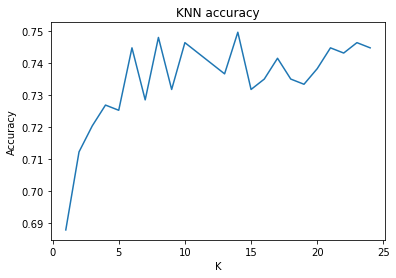

Best K value is 14


In [236]:
#K value determination 
sco = []
h=[]
best_score = 0
best_k = 0
for k in range(1,25):
    neigh = KNeighborsClassifier(n_neighbors = k).fit(x_train,y_train)
    Pred_y = neigh.predict(x_test)
    acc = metrics.accuracy_score(y_test, Pred_y)
    h.append(k)
    sco.append(acc)
    print("Accuracy of model at K=",k," is",acc)
    if acc > best_score:
        best_score = acc
        best_k = k
    
plt.plot(h, sco)
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('KNN accuracy')
plt.show()

print("Best K value is", best_k)

KNN classifier algorithm using 5 fold cross validations and determined the mean, standard deviation, confusion matrix and accuracy.

In [237]:
neigh = KNeighborsClassifier(n_neighbors = 14).fit(x_train,y_train)
Pred_y = neigh.predict(x_test)

scores = cross_val_score(neigh, x, y, cv=5, scoring='accuracy')

y_pred = neigh.predict(x_test)
conf_mat = confusion_matrix(y_test,y_pred)

print("Mean is ",scores.mean(),", Standard deviation is ",scores.std(),"and Accuracy is ",scores)
print("Confusion Matrix is ",conf_mat)

Mean is  0.7578558696205755 , Standard deviation is  0.030069794988236098 and Accuracy is  [0.75974026 0.72077922 0.75974026 0.81045752 0.73856209]
Confusion Matrix is  [[363  46]
 [108  98]]



 The accuracy of your KNN model Mean accuracy is 0.7578558696205755 whereas cv accuracy is [0.75974026 0.72077922 0.75974026 0.81045752 0.73856209]


GaussianNB classifier algorithm using 5 fold cross validations and determined the mean, standard deviation, confusion matrix and accuracy.

In [238]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(x_train, y_train)

score = cross_val_score(gnb, x, y, cv=5, scoring='accuracy')

y_pred = gnb.predict(x_test)
cm = confusion_matrix(y_test, y_pred)

print("Mean is ",score.mean(),", Standard deviation is ",score.std(),"and Accuracy is ",score)
print("Confusion Matrix is ",cm)

Mean is  0.7513368983957219 , Standard deviation is  0.018601807594185577 and Accuracy is  [0.75324675 0.72727273 0.74675325 0.78431373 0.74509804]
Confusion Matrix is  [[335  74]
 [ 73 133]]


BernoulliNB classifier algorithm using 5 fold cross validations and determined the mean, standard deviation, confusion matrix and accuracy.

In [239]:
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB(binarize=0.0)
bnb.fit(x_train, y_train)
scored = cross_val_score(bnb, x, y, cv=5, scoring='accuracy')

y_pred = bnb.predict(x_test)
c = confusion_matrix(y_test, y_pred)

print("Mean is ",scored.mean(),", Standard deviation is ",scored.std(),c,"and Accuracy is ",scored)
print("Confusion Matrix is ",cm)


Mean is  0.6471437059672354 , Standard deviation is  0.00822738107853071 [[297 112]
 [ 75 131]] and Accuracy is  [0.64935065 0.64935065 0.63636364 0.66013072 0.64052288]
Confusion Matrix is  [[335  74]
 [ 73 133]]


MultinomialNB classifier algorithm using 5 fold cross validations and determined the mean, standard deviation, confusion matrix and accuracy.

In [240]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

scord = cross_val_score(mnb, x, y, cv=5, scoring='accuracy')

print("Mean is ",scord.mean(),"and Standard deviation is ",scord.std(),"and Accuracy is ",scord)


Mean is  0.5937017231134878 and Standard deviation is  0.03474118413561096 and Accuracy is  [0.61688312 0.58441558 0.61688312 0.62091503 0.52941176]



GaussianNB Mean accuracy is 0.7513368983957219 where as cv accuracy [0.75324675 0.72727273 0.74675325 0.78431373 0.74509804]
BernoulliNB Mean accuracy is 0.6471437059672354 where as cv accuracy [0.64935065 0.64935065 0.63636364 0.66013072 0.64052288]
MultinomialNB Mean accuracy is 0.5937017231134878 where as cv accuracy [0.61688312 0.58441558 0.61688312 0.62091503 0.52941176]

Here GaussianNB provides the best accuracy for our dataset.


KNN classifier algorithm using leave-one-out cross validation and determined the mean, standard deviation and accuracy.

In [241]:
# Leave-One-Out for KNN Algorithm
c = LeaveOneOut()
neigh = KNeighborsClassifier(n_neighbors = 7).fit(x_train,y_train)
Pred_y = neigh.predict(x_test)

scores = cross_val_score(neigh, x, y, cv=c, scoring='accuracy')

y_pred = neigh.predict(x_test)
conf_mat = confusion_matrix(y_test,y_pred)

print("Mean is ",scores.mean(),"and Standard deviation is ",scores.std(),"and Accuracy is ",scores)


Mean is  0.7278645833333334 and Standard deviation is  0.4450592451149919 and Accuracy is  [0. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0.
 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1.
 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1.
 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1.
 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1.
 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1.
 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0.
 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1.
 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0.
 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1.
 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0.
 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0.

GaussianNB classifier algorithm using leave-one-out cross validation and determined the mean, standard deviation and accuracy.

In [242]:
# Leave-One-Out for GaussianNB

gnb_score= cross_val_score(gnb, x, y, cv=c)
gnb_mean=gnb_score.mean()
gnb_std=gnb_score.std()
print("Mean is ",gnb_mean,"and Standard deviation is ",gnb_std,"and Accuracy is ",gnb_score)


Mean is  0.75390625 and Standard deviation is  0.4307338113161509 and Accuracy is  [1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0.
 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1.
 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1.
 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 0. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1.
 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0.
 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1.
 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1.
 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 0. 1.
 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0


After using Leave-One-Out for both KNN and GaussianNB:

-KNN model without Leave-One-Out Mean accuracy is 0.7578558696205755
 KNN model with Leave-One-Out Mean accuracy is 0.7278645833333334

-GaussianNB without Leave-One-Out is 0.7513368983957219
 GaussianNB with Leave-One-Out Mean accuracy is 0.75390625
 
    Here According to KNN Model it gives better accuracy when Leave-One-Out is not used whereas in GaussianNB it gives better accuracy when Leave-One-Out is used.

Determined KNN or Naive Bayes works best with our data:

In [243]:
from sklearn.metrics import accuracy_score

# To Fit KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
knn_pred = knn.predict(x_test)
knn_accuracy = accuracy_score(y_test, knn_pred)

# To Fit Naive Bayes model
nb = GaussianNB()
nb.fit(x_train, y_train)
nb_pred = nb.predict(x_test)
nb_accuracy = accuracy_score(y_test, nb_pred)

# To Print the accuracy scores
print("KNN accuracy: ", knn_accuracy)
print("Naive Bayes accuracy: ", nb_accuracy)

if (knn_accuracy>nb_accuracy):
    print("KNN model provides better accuracy for our dataset")
else:
    print("Naive Bayes model provides better accuracy for our dataset")

KNN accuracy:  0.7252032520325203
Naive Bayes accuracy:  0.7609756097560976
Naive Bayes model provides better accuracy for our dataset


According to the accuracy of the model, and I retrained Naive Bayes classifier with our data

In [244]:

from sklearn import metrics
nb = GaussianNB()
nb.fit(x_train, y_train)
nb_pred = nb.predict(x_test)

accuracy = metrics.accuracy_score(y_test, nb_pred)
print("Accuracy on entire dataset: {:.3f}".format(accuracy))

Accuracy on entire dataset: 0.761



    Atlast I have selected the GaussianNB because that provides a good accuracy than KNN and the accuracy is 76%.